In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# queueing type = none, red, codel, pscodel
# filename format: queueingType-hiBandwidth-loBandwidth-#connections-packetLen-queueSize-interval.output
files = []

In [3]:
column_headers = ['ID','Start Time (sec)','End Time (sec)','Transfer (Kbytes)','Bandwidth (Kbits/sec)',
                  'Lost','Total','Pct Lost','Link Utilization (%)','Packet Delay (ms)']

In [17]:
def make_dataframe(filename): # make sure this includes the filepath
    file = open(filename, 'r')
    # This boolean tells us whether we've seen [ ID] - this will be the header column of our table
    start_analyzing = False
    data_table = []

    for line in file:
        
        if "[ ID]" in line:
            start_analyzing = True
            continue

        if not start_analyzing or "[SUM]" in line or "out-of-order" in line or "local" in line:
            continue

        print(line)

        ID = int(line[3])

        line = line[6:]

        start_time = 0

        if line[1] == ".":
            start_time = int(line[0])
            line = line[5:]
        elif line[2] == ".":
            start_time = int(line[0:2])
            line = line[6:]
        else:
            print("Error in getting start_time")

        end_time = 0

        if line[1] == ".":
            end_time = int(line[0])
            line = line[10:]
        elif line[2] == ".":
            end_time = int(line[0:2])
            line = line[11:]
        else:
            print("Error in getting end_time")

        if end_time - start_time > 10:
            continue
            
        if start_time < 20:
            continue
            
        data = line.split()
        #print(data)

        transfer = float(data[0])
        #ignore data[1]
        bandwidth = float(data[2])
        #ignore data[3]
        #ignore data[4] - but, if jitter = 0, line is bad
        if float(data[4]) == 0:
            continue
        #ignore data[5]
        lost = int(data[6].split('/')[0])
        total = int(data[7])
        pct_lost = float(data[8][1:].split('%')[0])
        link_util = ((transfer * 8) / (end_time - start_time)) / bandwidth * 100
        packet_delay = float(data[9].split('/')[0])
        #ignore the rest

        data_row = [ID,start_time,end_time,transfer,bandwidth,lost,total,pct_lost,link_util,packet_delay]
        data_table.append(data_row)

        #print("data_row:",data_row)

    return pd.DataFrame(data_table, columns=column_headers)

# Note for Reviewers
The next cell is one sample result you can recreate by running the iPerf command lines in our Instructions Google Doc.

Note that these results will be similar but not necessarily the same because each run will give slightly different outputs.

We also experimented with different iPerf settings, but we are still working toward reducing our link utilization, and we would be welcome to any suggestions.

To recreate our results in the cell below, you can run the following two lines, replacing 'server_outputs/target.output' with your file path and file name.

In [18]:
# CHANGE LATER
bandwidths = [500, 640]
bandwidths = [500]

In [19]:
# Parsing Group 9's Output
#df_group9_none_50 = make_dataframe('server_outputs/group9_none_50.output')
#df_group9_none_64 = make_dataframe('server_outputs/group9_none_64.output')
#df_group9_red_50 = make_dataframe('server_outputs/group9_red_50.output')
#df_group9_red_64 = make_dataframe('server_outputs/group9_red_64.output')
#df_group9_codel_50 = make_dataframe('server_outputs/group9_codel_50.output')
#df_group9_codel_64 = make_dataframe('server_outputs/group9_codel_64.output')



In [20]:
# Parsing Reviewer's Output
#df_reviewer_none_50 = make_dataframe('reviewer_none_50.output')
#df_reviewer_none_64 = make_dataframe('reviewer_none_64.output')
#df_reviewer_red_50 = make_dataframe('reviewer_red_50.output')
#df_reviewer_red_64 = make_dataframe('reviewer_red_64.output')
#df_reviewer_codel_50 = make_dataframe('reviewer_codel_50.output')
#df_reviewer_codel_64 = make_dataframe('reviewer_codel_64.output')



In [21]:
#group9_df = make_dataframe('server_outputs/none-200-50-6-800.output')
#group9_df


# Make dataframes
df_udp_noqueue = make_dataframe('server_outputs/udp-noqueue')
df_udp_codel = make_dataframe('server_outputs/udp-codel')
#df_noqueue_tcp = make_dataframe('server_outputs/apr-23/noqueue-10-2clients')
#df_codel_2clients = make_dataframe('server_outputs/apr-23/codel-10-2clients')

[  4] 0.00-5.00 sec  45.1 KBytes  73.9 Kbits/sec  30.508 ms    5/  154 (3.2%) 2311.503/17.283/4665.713/1387.023 ms   31 pps

[  5] 0.00-5.00 sec  45.1 KBytes  73.9 Kbits/sec  30.809 ms    5/  154 (3.2%) 2323.476/58.705/4676.640/1377.584 ms   31 pps

[  6] 0.00-5.00 sec  45.1 KBytes  73.9 Kbits/sec  30.311 ms    7/  154 (4.5%) 2338.677/61.949/4671.156/1361.081 ms   31 pps

[  7] 0.00-5.00 sec  45.1 KBytes  73.9 Kbits/sec  30.653 ms    8/  154 (5.2%) 2365.998/107.777/4687.521/1339.186 ms   31 pps

[  8] 0.00-5.00 sec  45.1 KBytes  73.9 Kbits/sec  30.518 ms   10/  154 (6.5%) 2378.708/167.802/4682.054/1319.128 ms   32 pps

[  3] 0.00-5.00 sec  45.4 KBytes  74.4 Kbits/sec  30.498 ms    1/  155 (0.65%) 2318.330/12.515/4690.789/1400.347 ms   31 pps

[  6] 5.00-10.00 sec  44.5 KBytes  73.0 Kbits/sec  30.996 ms    0/  152 (0%) 7042.835/4671.156/9324.650/1344.503 ms   30 pps

[  7] 5.00-10.00 sec  44.5 KBytes  73.0 Kbits/sec  30.154 ms    0/  152 (0%) 7051.650/4687.521/9319.191/1344.180 ms   31 

# Automate All Plots

In [22]:
# Organize data 

# Temp data
#group9_data = [group9_df['Packet Delay (ms)']]
#              df10['Packet Delay (ms)']]
#reviewer_data = [target_df['Packet Delay (ms)'],
#                df11['Packet Delay (ms)']]

udp_noqueue_loss_data = [df_udp_noqueue['Pct Lost']]
udp_codel_loss_data = [df_udp_codel['Pct Lost']]

udp_noqueue_delay_data = [df_udp_noqueue['Packet Delay (ms)']]
udp_codel_delay_data = [df_udp_codel['Packet Delay (ms)']]


#noqueue_2clients_loss_data = [df_noqueue_2clients['Pct Lost']]
#codel_2clients_loss_data = [df_codel_2clients['Pct Lost']]

#noqueue_2clients_delay_data = [df_noqueue_2clients['Packet Delay (ms)']]
#codel_2clients_delay_data = [df_codel_2clients['Packet Delay (ms)']]


all_data = np.zeros((6,2), dtype=object)

all_data[0,0] = udp_noqueue_loss_data
all_data[0,1] = udp_codel_loss_data

all_data[1,0] = udp_noqueue_delay_data
all_data[1,1] = udp_codel_delay_data

#all_data[2,0] = noqueue_2clients_loss_data
#all_data[2,1] = codel_2clients_loss_data

#all_data[3,0] = noqueue_2clients_delay_data
#all_data[3,1] = codel_2clients_delay_data


#all_data[4,0] = group9_data
#all_data[4,1] = group9_data
#all_data[5,0] = group9_data
#all_data[5,1] = group9_data


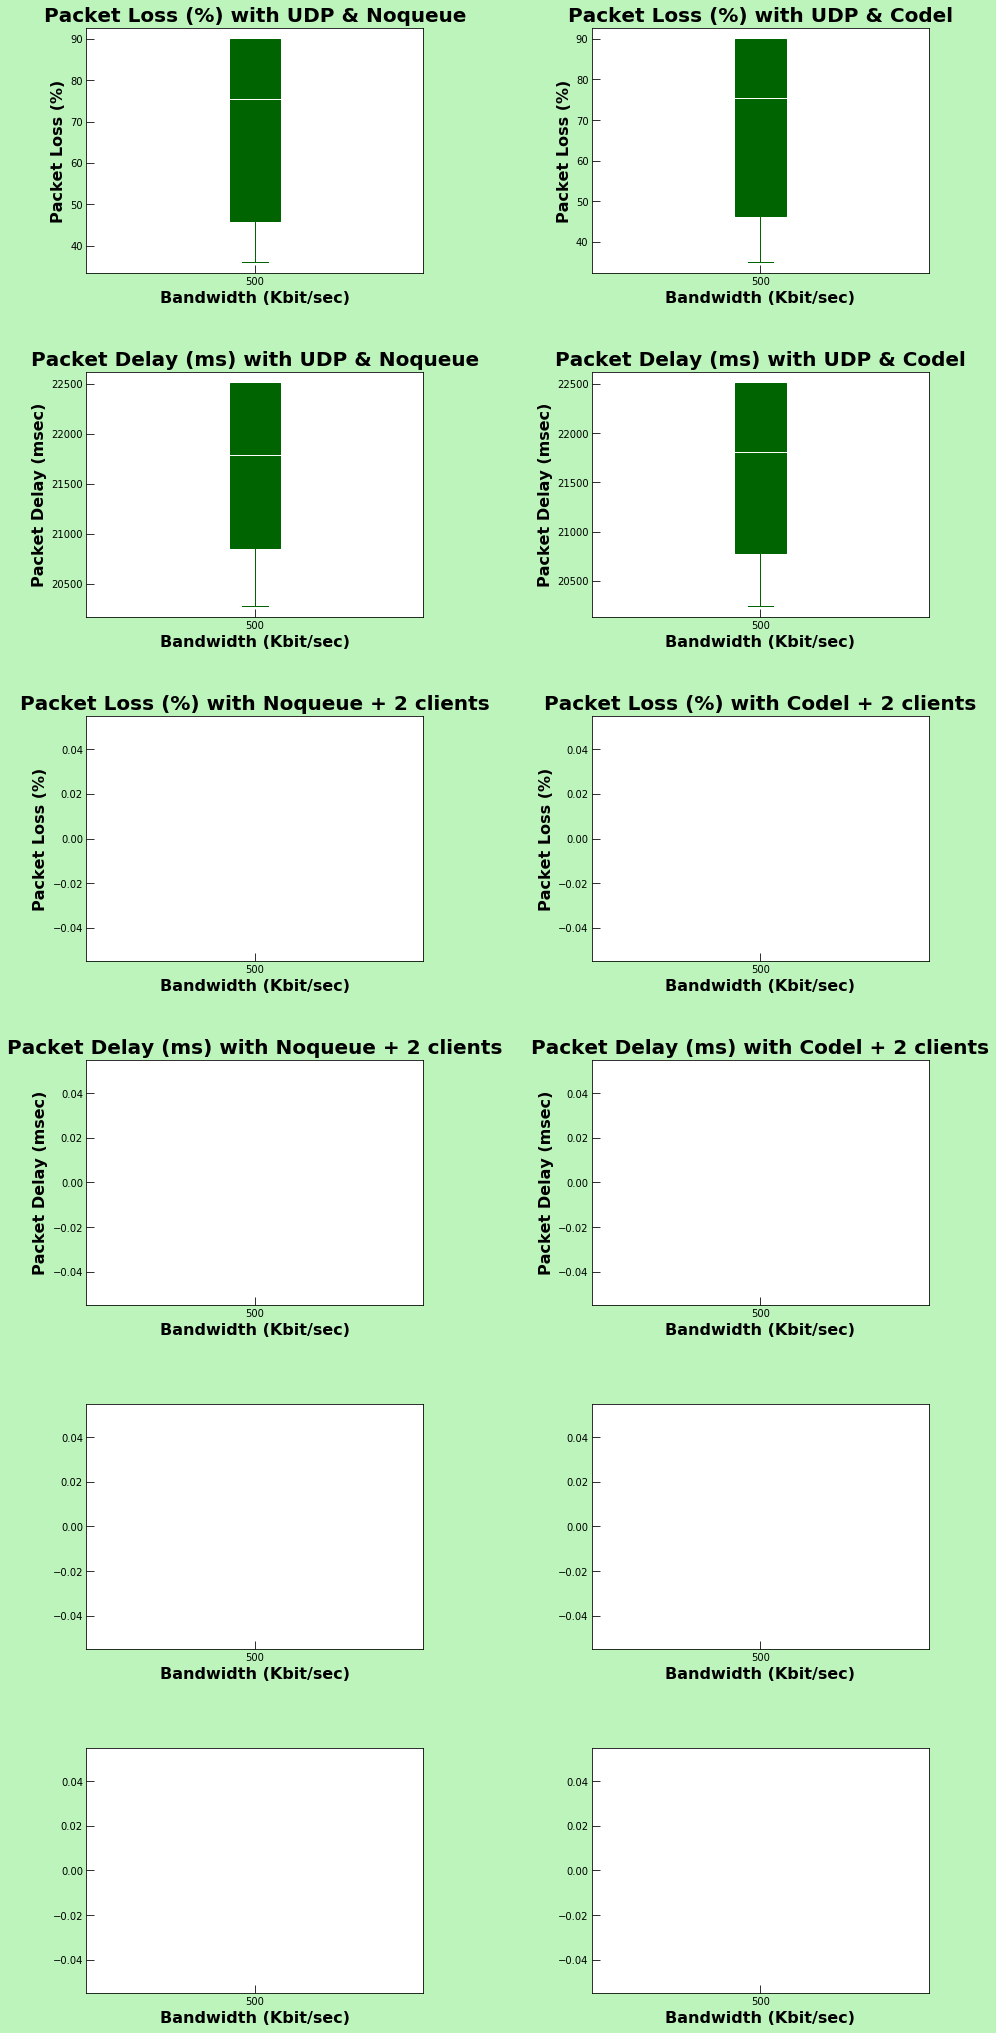

In [23]:
# Figure settings
fig, axs = plt.subplots(6,2, figsize=(13,26))
fig.patch.set_facecolor('lightgreen')
fig.patch.set_alpha(0.6)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1.1,
                    hspace=0.4, wspace=0.5)

for row in range(6):
    for col in range(2):
        
        plot = axs[row, col].boxplot(all_data[row, col], patch_artist=True)#, showfliers=False)
        
        title = ""
            
        if row == 0 and col == 0:
            title = "Packet Loss (%) with UDP & Noqueue"
            axs[row, col].set_ylabel('Packet Loss (%)', fontsize=16, fontweight='bold')
        elif row == 0 and col == 1:
            title = "Packet Loss (%) with UDP & Codel"
            axs[row, col].set_ylabel('Packet Loss (%)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 0:
            title = "Packet Delay (ms) with UDP & Noqueue"
            axs[row, col].set_ylabel('Packet Delay (msec)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 1:
            title = "Packet Delay (ms) with UDP & Codel"
            axs[row, col].set_ylabel('Packet Delay (msec)', fontsize=16, fontweight='bold')
        elif row == 2 and col == 0:
            title = "Packet Loss (%) with Noqueue + 2 clients"
            axs[row, col].set_ylabel('Packet Loss (%)', fontsize=16, fontweight='bold')
        elif row == 2 and col == 1:
            title = "Packet Loss (%) with Codel + 2 clients"
            axs[row, col].set_ylabel('Packet Loss (%)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 0:
            title = "Packet Delay (ms) with Noqueue + 2 clients"
            axs[row, col].set_ylabel('Packet Delay (msec)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 1:
            title = "Packet Delay (ms) with Codel + 2 clients"
            axs[row, col].set_ylabel('Packet Delay (msec)', fontsize=16, fontweight='bold')
        
        axs[row, col].set_title(title, fontsize=20, fontweight='bold')
        axs[row, col].set_xticklabels(bandwidths)
        axs[row, col].tick_params(direction="in", length=8)
        axs[row, col].set_xlabel('Bandwidth (Kbit/sec)', fontsize=16, fontweight='bold')
        
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            if item == 'medians':
                plt.setp(plot[item], color='white')
            else:
                plt.setp(plot[item], color='darkgreen')

In [11]:
# # AQM = None
# # Variable = Link Utilization
# # Left plot = Group 9's Results
# # Right plot = Reviewer's Results

# # Notation: who_df_AQM_bw-low
# # E.g.      group9_df_AQM_50

# group9_data = [group9_df['Link Utilization (%)'],
#               df10['Link Utilization (%)']]

# reviewer_data = [target_df['Link Utilization (%)'],
#                 df11['Link Utilization (%)']]

# fig, axs = plt.subplots(1,2)

# axs[0].boxplot(group9_data)
# axs[0].set_title('Group 9: Link Utilization with No AQM')
# axs[0].set_xticklabels([50, 64])

# axs[1].boxplot(reviewer_data)
# axs[1].set_title('Reviewer: Link Utilization with No AQM')
# axs[1].set_xticklabels([50, 64])

# fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)


In [12]:
# # AQM = RED
# # Variable = Packet Delay
# # Left plot = Group 9's Results
# # Right plot = Reviewer's Results

# # Notation: who_df_AQM_bw-low
# # E.g.      group9_df_AQM_50

# group9_data = [group9_df['Packet Delay (ms)'],
#               df10['Packet Delay (ms)']]

# reviewer_data = [target_df['Packet Delay (ms)'],
#                 df11['Packet Delay (ms)']]

# fig, axs = plt.subplots(1,2)

# axs[0].boxplot(group9_data)
# axs[0].set_title('Group 9: Packet Delay with RED')
# axs[0].set_xticklabels([50, 64])

# axs[1].boxplot(reviewer_data)
# axs[1].set_title('Reviewer: Packet Delay with RED')
# axs[1].set_xticklabels([50, 64])

# fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)

In [13]:
# # AQM = RED
# # Variable = Link Utilization
# # Left plot = Group 9's Results
# # Right plot = Reviewer's Results

# # Notation: who_df_AQM_bw-low
# # E.g.      group9_df_AQM_50

# group9_data = [group9_df['Link Utilization (%)'],
#               df10['Link Utilization (%)']]

# reviewer_data = [target_df['Link Utilization (%)'],
#                 df11['Link Utilization (%)']]

# fig, axs = plt.subplots(1,2)

# axs[0].boxplot(group9_data)
# axs[0].set_title('Group 9: Link Utilization with RED')
# axs[0].set_xticklabels([50, 64])

# axs[1].boxplot(reviewer_data)
# axs[1].set_title('Reviewer: Link Utilization with RED')
# axs[1].set_xticklabels([50, 64])

# fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)

In [14]:
# # AQM = CoDel
# # Variable = Packet Delay
# # Left plot = Group 9's Results
# # Right plot = Reviewer's Results

# # Notation: who_df_AQM_bw-low
# # E.g.      group9_df_AQM_50

# group9_data = [group9_df['Packet Delay (ms)'],
#               df10['Packet Delay (ms)']]

# reviewer_data = [target_df['Packet Delay (ms)'],
#                 df11['Packet Delay (ms)']]

# fig, axs = plt.subplots(1,2)

# axs[0].boxplot(group9_data)
# axs[0].set_title('Group 9: Packet Delay with CoDel')
# axs[0].set_xticklabels([50, 64])

# axs[1].boxplot(reviewer_data)
# axs[1].set_title('Reviewer: Packet Delay with CoDel')
# axs[1].set_xticklabels([50, 64])

# fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)

In [15]:
# # AQM = CoDel
# # Variable = Link Utilization
# # Left plot = Group 9's Results
# # Right plot = Reviewer's Results

# # Notation: who_df_AQM_bw-low
# # E.g.      group9_df_AQM_50

# group9_data = [group9_df['Link Utilization (%)'],
#               df10['Link Utilization (%)']]

# reviewer_data = [target_df['Link Utilization (%)'],
#                 df11['Link Utilization (%)']]

# fig, axs = plt.subplots(1,2)

# axs[0].boxplot(group9_data)
# axs[0].set_title('Group 9: Link Utilization with CoDel')
# axs[0].set_xticklabels([50, 64])

# axs[1].boxplot(reviewer_data)
# axs[1].set_title('Reviewer: Link Utilization with CoDel')
# axs[1].set_xticklabels([50, 64])

# fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)

# Automated Result Comparisons

### AQM: None
### Variable: Packet Delay
### Left Plot: Group 9's Results
### Right Plot: Reviewer's Results

In [16]:
#group9_data = [df_group9_none_50['Packet Delay (ms)'],
              #df_group9_none_64['Packet Delay (ms)']]

#reviewer_data = [df_reviewer_none_50['Packet Delay (ms)'],
                #df_reviewer_none_64['Packet Delay (ms)']]

#fig, axs = plt.subplots(1,2)

#axs[0].boxplot(group9_data)
#axs[0].set_title('Group 9: Packet Delay with No AQM')
#axs[0].set_xticklabels([50, 64])

#axs[1].boxplot(reviewer_data)
#axs[1].set_title('Reviewer: Packet Delay with No AQM')
#axs[1].set_xticklabels([50, 64])

#fig.subplots_adjust(left=0.08, right=1.98, bottom=0.05, top=0.9,
#                    hspace=0.4, wspace=0.3)